# A3: Solving nonlinear equations in 1d

<div class="alert alert-block alert-danger"> 
    ⚠ Do not edit the following cell. You may find some of these functions useful
</div>

In [108]:
using Plots
using LaTeXStrings
using PrettyTables

function simple_iteration( g, x1, N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        end
    end
    return x
end

# order of convergence
function orderOfConvergence( x, ξ; α=0)
    err = @. abs(x - ξ)
    logerr = @. log10( err )
    ratios = [NaN; [logerr[i+1] / logerr[i] for i in 1:length(logerr)-1]]
    if (α == 0) 
        α = ratios[end]
    end
    αr = round(α, sigdigits=3)
    mu = [NaN; [err[i+1] / err[i]^α for i in 1:length(err)-1]]
    pretty_table( 
        [1:length(x) x err ratios mu];
        header = ["iteration", "sequence", "abs. error", "ratio", "μ (α = $αr)"]
        # you may need to use column_labels instead of header
    )
end

# asymptotic error constant
function μ( x, ξ, α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

# some useful fucntions
id = x -> x;
g = x -> exp(-x);
g_prime = x -> -exp(-x);
h = x -> log(abs(1/x)); 
h_prime = x -> -1/x;

Ω = simple_iteration( g, 0.56, 100, 1e-15 )[end];


## A. Lambert W function

In A1, you were asked to prove that the *Lambert W function* (also called the *product-log function*) is a well-defined function $W : [0,\infty) \to [0,\infty)$ satisfying $W(a) e^{W(a)} = a$. Define $\Omega := W(1)$. Last time, essentially by the change of sign theorem, you showed that $\Omega \in [0.56, 0.58]$. 

1. ✍ Show that $\Omega$ is a fixed point of $g$ and $h$ as defined by  

\begin{align}
    g(x) = e^{-x}, \qquad h(x) = \log \left|\frac{1}{x}\right|
\end{align}

<div class='alert alert-block alert-success'><b>Answer.</b> 

We have $\Omega = W(1)$ and so $\Omega e^{\Omega} = 1$ and $\Omega = e^{-\Omega} = g(\Omega)$. We also have $e^{\Omega} = \Omega^{-1} = |\Omega^{-1}|$ because $\Omega > 0$. Taking logarithms on both sides gives $\Omega = \log |\Omega^{-1}| = h(\Omega)$.

</div> 

2. 💻 Show numerically that $x_{n+1} = g(x_n)$ converges and $y_{n+1} = h(y_n)$ diverges for a few different choices of $x_1$ and $y_1$.

<div class='alert alert-block alert-success'><b>Answer.</b> 

We will use the function ``simple_iteration( g, x1 )`` as defined above:

</div> 


In [96]:
function printErrors( x ) 
    data = [1:length(x) x (@.abs(x-Ω))]
    
    # you can also add colour!
    h1 = Highlighter(
            (data, i, j) -> (j == 3) && (data[i, j] > 1e-2),
            crayon"red bold"
    );
    h2 = Highlighter(
            (data, i, j) -> (j == 3) && (data[i, j] < 1e-5),
            crayon"green bold"
    );

    pretty_table( 
        data;
        header = ["n", "x[n]", "|x[n] - Ω|"],
        highlighters = (h1, h2) 
    )
end

println("Iteration xₙ₊₁ = g(xₙ) with x₁ = 1")
printErrors( simple_iteration( g, 1. ) )

Iteration xₙ₊₁ = g(xₙ) with x₁ = 1
┌──────┬──────────┬─────────────┐
│    n │     x[n] │  |x[n] - Ω| │
├──────┼──────────┼─────────────┤
│  1.0 │      1.0 │    0.432857 │
│  2.0 │ 0.367879 │    0.199264 │
│  3.0 │ 0.692201 │    0.125057 │
│  4.0 │ 0.500474 │   0.0666698 │
│  5.0 │ 0.606244 │   0.0391002 │
│  6.0 │ 0.545396 │   0.0217475 │
│  7.0 │ 0.579612 │    0.012469 │
│  8.0 │ 0.560115 │  0.00702783 │
│  9.0 │ 0.571143 │  0.00399982 │
│ 10.0 │ 0.564879 │  0.00226394 │
│ 11.0 │ 0.568429 │  0.00128543 │
│ 12.0 │ 0.566415 │ 0.000728557 │
│ 13.0 │ 0.567557 │ 0.000413347 │
│ 14.0 │ 0.566909 │ 0.000234378 │
│ 15.0 │ 0.567276 │ 0.000132942 │
│ 16.0 │ 0.567068 │   7.5392e-5 │
│ 17.0 │ 0.567186 │  4.27597e-5 │
│ 18.0 │ 0.567119 │  2.42504e-5 │
│ 19.0 │ 0.567157 │  1.37536e-5 │
│ 20.0 │ 0.567135 │   7.8002e-6 │
│ 21.0 │ 0.567148 │  4.42385e-6 │
│ 22.0 │ 0.567141 │  2.50895e-6 │
│ 23.0 │ 0.567145 │  1.42294e-6 │
│ 24.0 │ 0.567142 │  8.07008e-7 │
│ 25.0 │ 0.567144 │   4.5769e-7 │
│ 26.0 │ 0.56

In [97]:
x1 = 100.;
println("Iteration xₙ₊₁ = g(xₙ) with x₁ = $x1")
printErrors( simple_iteration( g, x1 ) )

Iteration xₙ₊₁ = g(xₙ) with x₁ = 100.0
┌──────┬─────────────┬─────────────┐
│    n │        x[n] │  |x[n] - Ω| │
├──────┼─────────────┼─────────────┤
│  1.0 │       100.0 │     99.4329 │
│  2.0 │ 3.72008e-44 │    0.567143 │
│  3.0 │         1.0 │    0.432857 │
│  4.0 │    0.367879 │    0.199264 │
│  5.0 │    0.692201 │    0.125057 │
│  6.0 │    0.500474 │   0.0666698 │
│  7.0 │    0.606244 │   0.0391002 │
│  8.0 │    0.545396 │   0.0217475 │
│  9.0 │    0.579612 │    0.012469 │
│ 10.0 │    0.560115 │  0.00702783 │
│ 11.0 │    0.571143 │  0.00399982 │
│ 12.0 │    0.564879 │  0.00226394 │
│ 13.0 │    0.568429 │  0.00128543 │
│ 14.0 │    0.566415 │ 0.000728557 │
│ 15.0 │    0.567557 │ 0.000413347 │
│ 16.0 │    0.566909 │ 0.000234378 │
│ 17.0 │    0.567276 │ 0.000132942 │
│ 18.0 │    0.567068 │   7.5392e-5 │
│ 19.0 │    0.567186 │  4.27597e-5 │
│ 20.0 │    0.567119 │  2.42504e-5 │
│ 21.0 │    0.567157 │  1.37536e-5 │
│ 22.0 │    0.567135 │   7.8002e-6 │
│ 23.0 │    0.567148 │  4.42385e-6 │

In [98]:
x1 = -1.;
println("Iteration xₙ₊₁ = g(xₙ) with x₁ = $x1")
printErrors( simple_iteration( g, x1 ) )

Iteration xₙ₊₁ = g(xₙ) with x₁ = -1.0
┌──────┬──────────┬─────────────┐
│    n │     x[n] │  |x[n] - Ω| │
├──────┼──────────┼─────────────┤
│  1.0 │     -1.0 │     1.56714 │
│  2.0 │  2.71828 │     2.15114 │
│  3.0 │ 0.065988 │    0.501155 │
│  4.0 │ 0.936142 │    0.368999 │
│  5.0 │ 0.392138 │    0.175006 │
│  6.0 │ 0.675611 │    0.108468 │
│  7.0 │ 0.508845 │   0.0582979 │
│  8.0 │ 0.601189 │    0.034046 │
│  9.0 │ 0.548159 │    0.018984 │
│ 10.0 │ 0.578013 │   0.0108695 │
│ 11.0 │ 0.561012 │  0.00613117 │
│ 12.0 │ 0.570631 │  0.00348793 │
│ 13.0 │ 0.565169 │  0.00197471 │
│ 14.0 │ 0.568264 │  0.00112105 │
│ 15.0 │ 0.566508 │ 0.000635441 │
│ 16.0 │ 0.567504 │   0.0003605 │
│ 17.0 │ 0.566939 │ 0.000204419 │
│ 18.0 │ 0.567259 │ 0.000115946 │
│ 19.0 │ 0.567078 │  6.57544e-5 │
│ 20.0 │ 0.567181 │  3.72934e-5 │
│ 21.0 │ 0.567122 │  2.11503e-5 │
│ 22.0 │ 0.567155 │  1.19954e-5 │
│ 23.0 │ 0.567136 │  6.80306e-6 │
│ 24.0 │ 0.567147 │  3.85832e-6 │
│ 25.0 │ 0.567141 │  2.18822e-6 │
│ 26.0 │ 0

In [99]:
x1 = 2.;
println("Iteration xₙ₊₁ = h(xₙ) with x₁ = $x1")
printErrors( simple_iteration( h, x1 ) )

Iteration xₙ₊₁ = h(xₙ) with x₁ = 2.0
┌───────┬──────────────┬────────────┐
│     n │         x[n] │ |x[n] - Ω| │
├───────┼──────────────┼────────────┤
│   1.0 │          2.0 │    1.43286 │
│   2.0 │    -0.693147 │    1.26029 │
│   3.0 │     0.366513 │    0.20063 │
│   4.0 │      1.00372 │   0.436578 │
│   5.0 │   -0.0037146 │   0.570858 │
│   6.0 │      5.59549 │    5.02834 │
│   7.0 │     -1.72196 │     2.2891 │
│   8.0 │    -0.543463 │    1.11061 │
│   9.0 │     0.609793 │    0.04265 │
│  10.0 │     0.494635 │   0.072508 │
│  11.0 │     0.703935 │   0.136791 │
│  12.0 │      0.35107 │   0.216073 │
│  13.0 │      1.04677 │   0.479627 │
│  14.0 │   -0.0457093 │   0.612853 │
│  15.0 │      3.08545 │    2.51831 │
│  16.0 │      -1.1267 │    1.69384 │
│  17.0 │    -0.119292 │   0.686435 │
│  18.0 │      2.12618 │    1.55904 │
│  19.0 │    -0.754329 │    1.32147 │
│  20.0 │     0.281927 │   0.285216 │
│  21.0 │      1.26611 │   0.698963 │
│  22.0 │    -0.235946 │   0.803089 │
│  23.0 │    

In [100]:
x1 = Ω + 1e-10;
println("Iteration xₙ₊₁ = h(xₙ) with x₁ = $x1")
printErrors( simple_iteration( h, x1 ) )

Iteration xₙ₊₁ = h(xₙ) with x₁ = 0.5671432905097845
┌───────┬────────────┬─────────────┐
│     n │       x[n] │  |x[n] - Ω| │
├───────┼────────────┼─────────────┤
│   1.0 │   0.567143 │     1.0e-10 │
│   2.0 │   0.567143 │ 1.76324e-10 │
│   3.0 │   0.567143 │ 3.10897e-10 │
│   4.0 │   0.567143 │ 5.48182e-10 │
│   5.0 │   0.567143 │ 9.66566e-10 │
│   6.0 │   0.567143 │  1.70427e-9 │
│   7.0 │   0.567143 │  3.00501e-9 │
│   8.0 │   0.567143 │   5.2985e-9 │
│   9.0 │   0.567143 │  9.34244e-9 │
│  10.0 │   0.567143 │  1.64728e-8 │
│  11.0 │   0.567143 │  2.90452e-8 │
│  12.0 │   0.567143 │  5.12132e-8 │
│  13.0 │   0.567143 │  9.03003e-8 │
│  14.0 │   0.567143 │   1.5922e-7 │
│  15.0 │   0.567144 │   2.8074e-7 │
│  16.0 │   0.567143 │  4.95006e-7 │
│  17.0 │   0.567144 │  8.72807e-7 │
│  18.0 │   0.567142 │  1.53895e-6 │
│  19.0 │   0.567146 │  2.71352e-6 │
│  20.0 │   0.567139 │  4.78453e-6 │
│  21.0 │   0.567152 │  8.43622e-6 │
│  22.0 │   0.567128 │  1.48748e-5 │
│  23.0 │    0.56717 │ 

<div class='alert alert-block alert-success'>

We have therefore seen that $x_{n+1} = g(x_n)$ converges to $\Omega$ for all $x_1 \in \{ -1, 1, 100 \}$ and $y_{n+1} = g(y_n)$ diverges for $y_1 \in \{ 1, \Omega + 10^{-10}  \}$.

</div> 

   
We will show that $\Omega$ is a stable fixed point of $g$ but an unstable fixed point of $h$.

3. ✍ Show that $g:[\frac{1}{e}, 1]\to[\frac{1}{e},1]$ with $|g'| < 1$, 

<div class='alert alert-block alert-success'><b>Answer.</b> 

The function $g(x) = e^{-x}$ is decreasing with $g(1) = \frac1e$ and $g(\tfrac1e) = e^{-\tfrac1e}$. Therefore, $g( [\frac{1}{e}, 1] ) \subset [ \frac1e, e^{-\tfrac1e} ] \subset [\frac1e, 1]$.

Moreover, we have $|g'(x)| = |-e^{-x}| \leq e^{-\tfrac1e} < 1$ for all $x \in [\frac1e, 1]$.

This can also be seen in the following plot:

</div> 

[g(1), g(1/e)] = [1/e, 0.6922006275553464] ⊂ [1/e, 1]


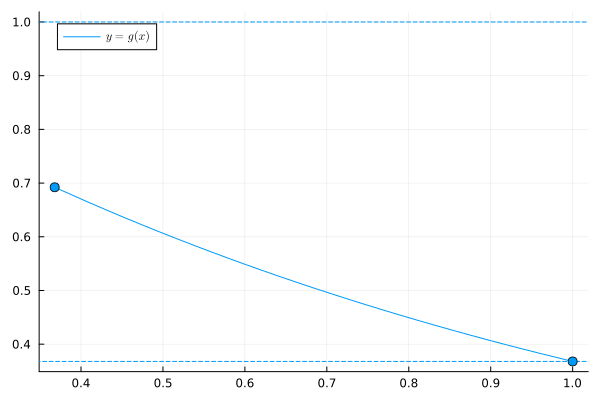

In [101]:
println( "[g(1), g(1/e)] = [1/e, ", g(1/exp(1)), "] ⊂ [1/e, 1]" )

plot( g, 1/exp(1), 1, label=L"y = g(x)" )
hline!( [1/exp(1), 1] , linestyle=[:dash :dash], primary=false)
scatter!( [1/exp(1), 1], [g(1/exp(1)), g(1)], markersize=5, primary=false )

4. ✍ Explain why this means that the iteration $x_{n+1} = g(x_n)$ converges for all $x_1 \in [\frac{1}{e}, 1]$,

<div class='alert alert-block alert-success'><b>Answer.</b> 

Since $|g'(x)| \leq e^{-\frac1e} < 1$ for all $x \in [\frac{1}{e}, 1]$ (which we showed in part 3.), $g$ is a contraction on $[\frac{1}{e}, 1]$. By the contraction mapping theorem, there exists unique fixed point $\xi = g(\xi) \in [\frac{1}{e}, 1]$ and the iteration $x_{n+1} = g(x_n)$ converges at least linearly for all $x_1 \in [\frac{1}{e}, 1]$.

</div> 

5. ✍ Now fix $x_1 \in \mathbb R$. Show that the sequence $(x_n)$ is eventually contained in $[0,1]$ and that $g : [0,1] \to [\frac{1}{e}, 1]$. Explain why this means that $(x_n)$ converges for all $x_1 \in \mathbb R$,

<div class='alert alert-block alert-success'><b>Answer.</b> 

For any $x_1 \in \mathbb R$, we have $x_2 = g(x_1) = e^{-x_1} \geq 0$. Then, either $x_2 \in [0,1]$ or $x_2 > 1$. In the later case, $x_3 = g(x_2) = e^{-x_2} \in [0, \frac1e] \subset [0,1]$. That is, either $x_2 \in [0,1]$ or $x_3 \in [0,1]$. Since $g$ is decreasing, we have $g([0,1])\in [\frac1e, 1 ]$ and so either $x_3 \in  [\frac1e, 1 ]$ or $x_4 \in  [\frac1e, 1 ]$. By the previous part, the iteration $x_{n+1} = g(x_n)$ started in $[\frac1e,1]$ converges. 

</div> 

6. ✍ What is the order of convergence of this method? 

<div class='alert alert-block alert-success'><b>Answer.</b> 

We showed in lectures that 

\begin{align}
    \lim_{n\to\infty}\frac
        {|x_{n+1} - \Omega |}
        {|x_n - \Omega|}
    = \left| g'(\Omega) \right|.
\end{align}

In this particular case $|g'(\Omega)| = e^{-\Omega} = g(\Omega) = \Omega > 0$. As a result, the convergence is linear.

</div> 

7. 💻 Confirm this numerically. 

<div class='alert alert-block alert-success'><b>Answer.</b> 

By computing 

\begin{align}
    \frac
        {|x_{n+1}-\Omega|}
        {|x_n - \Omega|}
\end{align}

we see that this approaches a value in $(0,1)$ as $n\to\infty$:


</div> 

In [102]:
println( "theoretical value of μ = ", Ω)
x = simple_iteration( g, 1. ) 
orderOfConvergence( x, Ω, α=1 )

theoretical value of μ = 0.5671432904097845
┌───────────┬──────────┬─────────────┬─────────┬─────────────┐
│ iteration │ sequence │  abs. error │   ratio │ μ (α = 1.0) │
├───────────┼──────────┼─────────────┼─────────┼─────────────┤
│       1.0 │      1.0 │    0.432857 │     NaN │         NaN │
│       2.0 │ 0.367879 │    0.199264 │ 1.92647 │    0.460346 │
│       3.0 │ 0.692201 │    0.125057 │ 1.28879 │    0.627597 │
│       4.0 │ 0.500474 │   0.0666698 │ 1.30256 │    0.533114 │
│       5.0 │ 0.606244 │   0.0391002 │ 1.19705 │    0.586476 │
│       6.0 │ 0.545396 │   0.0217475 │ 1.18097 │    0.556199 │
│       7.0 │ 0.579612 │    0.012469 │  1.1453 │    0.573355 │
│       8.0 │ 0.560115 │  0.00702783 │ 1.13077 │    0.563622 │
│       9.0 │ 0.571143 │  0.00399982 │ 1.11368 │    0.569141 │
│      10.0 │ 0.564879 │  0.00226394 │ 1.10308 │    0.566011 │
│      11.0 │ 0.568429 │  0.00128543 │ 1.09293 │    0.567786 │
│      12.0 │ 0.566415 │ 0.000728557 │  1.0853 │    0.566779 │
│      13.0

8. ✍ Show that $(y_n)$ doesn't converge to $\Omega$ for any choice of $y_1 \not= \Omega$

<div class='alert alert-block alert-success'><b>Answer.</b>

We know that $\Omega = h(\Omega)$. The derivative is $h'(x) = \frac1{1/x} \left(-\frac{1}{x^2}\right) = - \frac{1}{x}$. Therefore, we have $\left|h'(\Omega)\right| = \frac{1}{\Omega} \approx 1.76$ (see code below) and in a small interval around $\Omega$, we have $|h'| > 1$. By a result from lectures, this means that the sequence $y_{n+1} = h(y_n)$ does not converge to $\Omega$.

(Recall the proof of this statement: if $y_n \in I\setminus\{\xi\}$ for some small interval $I$ around $\xi$ for which $|h'|>1$ on $I$, then $|y_{n+1} - \xi| = |h(y_n) - \xi| = |h'(\eta)| |x_{n}-\xi| > |x_{n}-\xi|$ and so the sequence is eventually leaves $I$)

</div> 

In [103]:
-1/Ω

-1.7632228343518948

## B. Bisection Method

Suppose that $f \colon [a,b] \to \mathbb R$ is continuous with $f(a) f(b) \leq 0$. By the change of sign theorem, there exists $\xi \in [a,b]$ for which $f(\xi) = 0$. The bisection method can be described by the following pseudocode:

<div style="font-family:monospace;">
<pre>
    INPUT:  f    : function
            a, b : interval on which f is defined     
            tol  : tolerance
            N    : maximum number of iterations
    OUTPUT: x    : such that |f(x)| < tol
    for n in 1:N
        c = midpoint of a and b
        if ( |f(c)| < tol ) 
            OUTPUT: approximate root c
        else if ( f changes sign on [a,c] )                                    
            b = c; 
        else 
            a = c;      
    end
    OUTPUT: "root not found"
</pre>
</div>

1. 💻 Implement this method in the following cell

converged in 35 iterations
┌────┬──────────┬─────────────┐
│  n │     x[n] │  |x[n] - ξ| │
├────┼──────────┼─────────────┤
│  1 │      0.5 │    0.103667 │
│  2 │     0.25 │    0.146333 │
│  3 │    0.375 │   0.0213327 │
│  4 │   0.4375 │   0.0411673 │
│  5 │  0.40625 │  0.00991727 │
│  6 │ 0.390625 │  0.00570773 │
│  7 │ 0.398438 │  0.00210477 │
│  8 │ 0.394531 │  0.00180148 │
│  9 │ 0.396484 │ 0.000151645 │
│ 10 │ 0.395508 │ 0.000824917 │
│ 11 │ 0.395996 │ 0.000336636 │
│ 12 │  0.39624 │  9.24954e-5 │
│ 13 │ 0.396362 │  2.95749e-5 │
│ 14 │ 0.396301 │  3.14602e-5 │
│ 15 │ 0.396332 │  9.42651e-7 │
│ 16 │ 0.396347 │  1.43161e-5 │
│ 17 │ 0.396339 │  6.68674e-6 │
│ 18 │ 0.396336 │  2.87205e-6 │
│ 19 │ 0.396334 │  9.64697e-7 │
│ 20 │ 0.396333 │  1.10231e-8 │
│ 21 │ 0.396332 │  4.65814e-7 │
│ 22 │ 0.396333 │  2.27395e-7 │
│ 23 │ 0.396333 │  1.08186e-7 │
│ 24 │ 0.396333 │  4.85816e-8 │
│ 25 │ 0.396333 │  1.87792e-8 │
│ 26 │ 0.396333 │  3.87807e-9 │
│ 27 │ 0.396333 │  3.57251e-9 │
│ 28 │ 0.3963

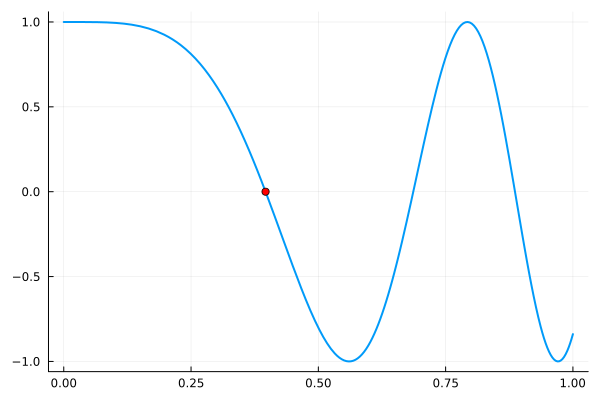

In [104]:
function bisection( f, a, b; tol=1e-10, N=100)

    x = [];
    for n in 1:N
        c = (a+b)/2
        x = push!(x, c)
        if ( abs( f( c ) ) < tol )
            println("converged in ", n, " iterations")
            return x 
        elseif ( f(a)*f(c) < 0 )
            b = c
        else
            a = c 
        end
    end
    @warn "did not converge after $N iterations"
    return x 

end

f = x -> cos( 10 * x^2 ); 
x = bisection( f, 0.0, 1.0 );

ξ = sqrt(pi/20)

data = [1:length(x) x (@.abs(x-ξ))]
    
pretty_table( 
    data;
    header = ["n", "x[n]", "|x[n] - ξ|"],
)

plot( f , 0, 1, legend=false, lw = 2)
scatter!( [x[end]], [f(x[end])], color="red" )

2. ✍ Suppose there exists a unique root $\xi \in [a,b]$. What is the order of convergence of the bisection method? What is the asymptotic error constant?

<div class='alert alert-block alert-success'><b>Answer.</b> 

We have $x_1 = \frac{a + b}{2}$ and thus $|x_1 - \xi| \leq \frac{1}{2}(b-a)$. Moreover, since the size of the interval containing $\xi$ is halved at each iteration, we have $|x_n - \xi| \leq \big(\frac{1}{2}\big)^{n} (b-a)$. As a result, the bisection method converges linearly with asymptotic error constant $\frac12$.

</div> 

3. ✍💻 Plot $f(x) = (1+x^2) \mathrm{sign}(x - \xi)$ and explain what happens when you apply the bisection method to $f$,

<div class='alert alert-block alert-success'><b>Answer.</b> 

The algorithm should run as normal and converge to $\xi$: the same bracketing argument applies to $f$ because it only has one point of discontinuity and a unique point at which the sign of $f$ changes. 

</div> 

converged in 54 iterations
┌────┬──────────┬─────────────┐
│  n │     x[n] │  |x[n] - ξ| │
├────┼──────────┼─────────────┤
│  1 │      0.5 │     0.18169 │
│  2 │     0.25 │   0.0683099 │
│  3 │    0.375 │   0.0566901 │
│  4 │   0.3125 │  0.00580989 │
│  5 │  0.34375 │   0.0254401 │
│  6 │ 0.328125 │  0.00981511 │
│  7 │ 0.320312 │  0.00200261 │
│  8 │ 0.316406 │  0.00190364 │
│  9 │ 0.318359 │  4.94888e-5 │
│ 10 │ 0.317383 │ 0.000927074 │
│ 11 │ 0.317871 │ 0.000438792 │
│ 12 │ 0.318115 │ 0.000194652 │
│ 13 │ 0.318237 │  7.25815e-5 │
│ 14 │ 0.318298 │  1.15463e-5 │
│ 15 │ 0.318329 │  1.89712e-5 │
│ 16 │ 0.318314 │  3.71245e-6 │
│ 17 │ 0.318306 │  3.91695e-6 │
│ 18 │  0.31831 │  1.02248e-7 │
│ 19 │ 0.318312 │   1.8051e-6 │
│ 20 │ 0.318311 │  8.51426e-7 │
│ 21 │  0.31831 │  3.74589e-7 │
│ 22 │  0.31831 │   1.3617e-7 │
│ 23 │  0.31831 │   1.6961e-8 │
│ 24 │  0.31831 │  4.26436e-8 │
│ 25 │  0.31831 │  1.28413e-8 │
│ 26 │  0.31831 │  2.05988e-9 │
│ 27 │  0.31831 │   5.3907e-9 │
│ 28 │  0.318

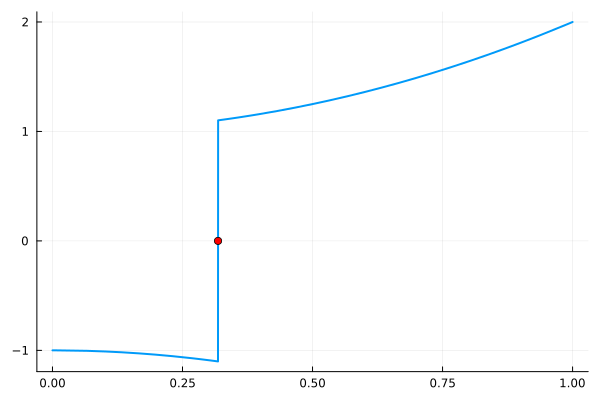

In [105]:
ξ, f = 1/π, x -> (1 + x^2) * sign(x - ξ)
x = bisection( f, 0.0, 1.0 );

data = [1:length(x) x (@.abs(x-ξ))]
    
pretty_table( 
    data;
    header = ["n", "x[n]", "|x[n] - ξ|"],
)

plot( f , 0, 1, legend=false, lw = 2)
scatter!( [x[end]], [0], color="red" )

4. 💻 Use the bisection method to approximate $\Omega = W(1)$,

converged in 33 iterations
┌────┬──────────┬─────────────┐
│  n │     x[n] │  |x[n] - ξ| │
├────┼──────────┼─────────────┤
│  1 │      0.5 │   0.0671433 │
│  2 │     0.75 │    0.182857 │
│  3 │    0.625 │   0.0578567 │
│  4 │   0.5625 │  0.00464329 │
│  5 │  0.59375 │   0.0266067 │
│  6 │ 0.578125 │   0.0109817 │
│  7 │ 0.570312 │  0.00316921 │
│  8 │ 0.566406 │  0.00073704 │
│  9 │ 0.568359 │  0.00121608 │
│ 10 │ 0.567383 │ 0.000239522 │
│ 11 │ 0.566895 │ 0.000248759 │
│ 12 │ 0.567139 │  4.61853e-6 │
│ 13 │ 0.567261 │ 0.000117452 │
│ 14 │   0.5672 │  5.64166e-5 │
│ 15 │ 0.567169 │   2.5899e-5 │
│ 16 │ 0.567154 │  1.06403e-5 │
│ 17 │ 0.567146 │  3.01086e-6 │
│ 18 │ 0.567142 │  8.03838e-7 │
│ 19 │ 0.567144 │  1.10351e-6 │
│ 20 │ 0.567143 │  1.49837e-7 │
│ 21 │ 0.567143 │     3.27e-7 │
│ 22 │ 0.567143 │  8.85818e-8 │
│ 23 │ 0.567143 │  3.06275e-8 │
│ 24 │ 0.567143 │  2.89771e-8 │
│ 25 │ 0.567143 │ 8.25186e-10 │
│ 26 │ 0.567143 │   1.4076e-8 │
│ 27 │ 0.567143 │   6.6254e-9 │
│ 28 │ 0.5671

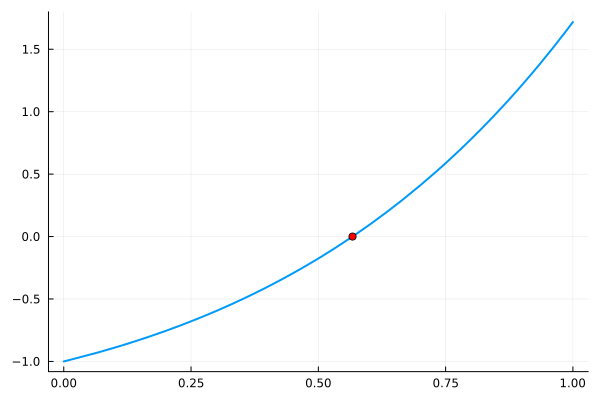

In [106]:
ξ, f = Ω, x -> x*exp(x)-1
x = bisection( f, 0.0, 1.0 );

data = [1:length(x) x (@.abs(x-ξ))]
    
pretty_table( 
    data;
    header = ["n", "x[n]", "|x[n] - ξ|"],
)

plot( f , 0, 1, legend=false, lw = 2)
scatter!( [x[end]], [0], color="red" )

5. 💻 Use the bisection method to approximate $\sqrt{2}$.

converged in 30 iterations
┌────┬─────────┬─────────────┐
│  n │    x[n] │  |x[n] - ξ| │
├────┼─────────┼─────────────┤
│  1 │     1.0 │    0.414214 │
│  2 │     1.5 │   0.0857864 │
│  3 │    1.25 │    0.164214 │
│  4 │   1.375 │   0.0392136 │
│  5 │  1.4375 │   0.0232864 │
│  6 │ 1.40625 │  0.00796356 │
│  7 │ 1.42188 │  0.00766144 │
│  8 │ 1.41406 │ 0.000151062 │
│  9 │ 1.41797 │  0.00375519 │
│ 10 │ 1.41602 │  0.00180206 │
│ 11 │ 1.41504 │   0.0008255 │
│ 12 │ 1.41455 │ 0.000337219 │
│ 13 │ 1.41431 │  9.30783e-5 │
│ 14 │ 1.41418 │  2.89921e-5 │
│ 15 │ 1.41425 │  3.20431e-5 │
│ 16 │ 1.41422 │  1.52552e-6 │
│ 17 │  1.4142 │  1.37333e-5 │
│ 18 │ 1.41421 │  6.10388e-6 │
│ 19 │ 1.41421 │  2.28918e-6 │
│ 20 │ 1.41421 │  3.81831e-7 │
│ 21 │ 1.41421 │  5.71843e-7 │
│ 22 │ 1.41421 │  9.50061e-8 │
│ 23 │ 1.41421 │  1.43413e-7 │
│ 24 │ 1.41421 │  2.42032e-8 │
│ 25 │ 1.41421 │  3.54014e-8 │
│ 26 │ 1.41421 │  5.59909e-9 │
│ 27 │ 1.41421 │  9.30207e-9 │
│ 28 │ 1.41421 │  1.85149e-9 │
│ 29 │ 1.414

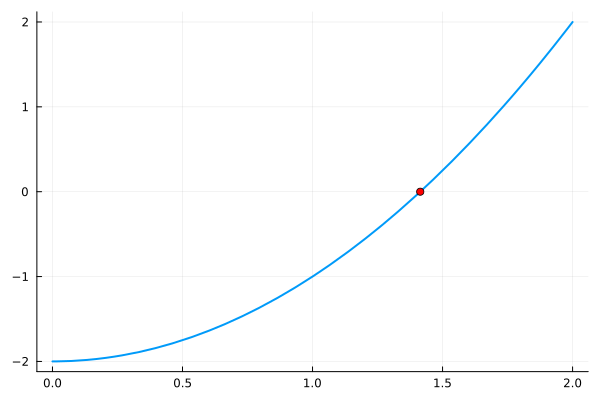

In [107]:
ξ, f = sqrt(2), x -> x^2-2
x = bisection( f, 0.0, 2.0 );

data = [1:length(x) x (@.abs(x-ξ))]
    
pretty_table( 
    data;
    header = ["n", "x[n]", "|x[n] - ξ|"],
)

plot( f , 0, 2, legend=false, lw = 2)
scatter!( [x[end]], [0], color="red" )